# Welcome to FI6024 E-tivity 3

The aims of this activity are as follows:

i)  To engineer features which might be predictive of forward returns (target).

ii) To train, test and compare classification learning models on a financial data structure.

iii) To improve our models through hyperparameter tuning and dropping overlapping labels.

#### Your tasks are:

1) Enter your name and UL Student ID in the next section.

2) Run the remainder of the code, taking your time to understand each cell. 

3) Complete Tasks 1-12 where the sections of code are highlighted with #TODO.

#### Student Information:
Your Name: Zheng Hanming

Your Student ID Number: 21225621 

### Install Libraries

In [1]:
# pip install -U setuptools 

In [2]:
# pip install graphviz==0.10.1 --user

If you experience issues installing graphviz, try install graphviz-2.49.0 directly from [here](https://graphviz.org/download/), restart your computer and re-run.

In [3]:
# pip install SQLAlchemy graphviz numpy pandas scipy scikit-learn six tqdm python-dateutil --user

### Imports

In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

# Section A: Feature Engineering & Classification Model Fit

#### Overview of Section A:

* **TASK 1)** Feature Engineering: Create variables which might be predictive of 5-day (1 week) forward returns (target), including start/end of month/quarter features and one-hot encoded sector features.


* **TASK 2)** Train/Valid/Test Splits: Split the dataframe into a train, validation, and test dataset.


* **TASK 3)** Fit and test a Decision Tree Classifier


* **TASK 4)** Fit and test a Random Forest Classifier



### Import the data

In [5]:
ticker_df = pd.read_excel('Data.xlsx', sheet_name='Data') 
ticker_df['Date'] = pd.to_datetime(ticker_df.Date)
ticker_df = ticker_df.set_index('Date')
ticker_df.head()

Ticker  close_price  return_5d  \
Date                                                       
2013-01-03 00:00:00+00:00      A       67.051   0.013820   
2013-01-03 00:00:00+00:00    AAL       13.460   0.056681   
2013-01-03 00:00:00+00:00    AAP       71.719   0.026772   
2013-01-03 00:00:00+00:00   AAPL       70.382   0.070221   
2013-01-03 00:00:00+00:00    ABC       39.877   0.008574   

                           Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                               -0.262769   
2013-01-03 00:00:00+00:00                                0.099926   
2013-01-03 00:00:00+00:00                                1.669138   
2013-01-03 00:00:00+00:00                                1.698746   
2013-01-03 00:00:00+00:00                               -1.113992   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -1.207978                     -1.485669   
2013-01-03 00:00:00+00:00      1.713471                      0.919350   
2013-01-03 00:00:00+00:00     -1.535061                      1.507733   
2013-01-03 00:00:00+00:00      1.193111                     -1.367992   
2013-01-03 00:00:00+00:00     -0.509209                     -0.029419   

                           adv_120d   adv_20d  volatility_20d  sector_code  \
Date                                                                         
2013-01-03 00:00:00+00:00  1.338573  1.397411       -1.219809            0   
2013-01-03 00:00:00+00:00  1.139994  1.081155        1.566220            3   
2013-01-03 00:00:00+00:00 -0.301547 -0.919350       -1.470404            8   
2013-01-03 00:00:00+00:00  1.728377  1.728377        1.617813            1   
2013-01-03 00:00:00+00:00  0.176515  0.227999       -1.367218            0   

                           dispersion_120d  dispersion_20d  market_vol_120d  \
Date                                                                          
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   

                           market_vol_20d  weekday  
Date                                                
2013-01-03 00:00:00+00:00        0.137586        3  
2013-01-03 00:00:00+00:00        0.137586        3  
2013-01-03 00:00:00+00:00        0.137586        3  
2013-01-03 00:00:00+00:00        0.137586        3  
2013-01-03 00:00:00+00:00        0.137586        3

### Task 1) Feature Engineering
Using the ticker DataFrame, engineer features which we think might be predictive of 5-day (1 week) forward returns.

The final dataset should include the following features and target:



#### a) Create Date Parts (January/December) factors

* We will make features that might capture trader/investor behavior due to calendar anomalies.
* Note that we can access the date index. using `Dataframe.index.get_level_values(0)`, since the date is stored as index level 0, and the asset name is stored in index level 1.  This is of type [DateTimeIndex](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html).

In [6]:
ticker_df.index.get_level_values(0)

DatetimeIndex(['2013-01-03 00:00:00+00:00', '2013-01-03 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-03 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-03 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-03 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-03 00:00:00+00:00',
               ...
               '2015-12-28 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-28 00:00:00+00:00', '2015-12-28 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=354891, freq=None)

#### [DateTimeIndex attributes](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)

* The `month` attribute is a numpy array with a 1 for January, 2 for February ... 12 for December etc.  
* We can use a comparison operator such as `==` to return True or False.

#### ✅ TODO
* Create a numpy array that has 1 when the month is January, and 0 otherwise.  Store it as a column in the all_factors dataframe.
* Add another similar column to indicate when the month is December

In [7]:
# create a feature that indicate whether it's January
ticker_df['is_January'] = (ticker_df.index.get_level_values(0).month == 1).astype(int)

# create a feature to indicate whether it's December
ticker_df['is_December'] = (ticker_df.index.get_level_values(0).month == 12).astype(int)

ticker_df.head()

Ticker  close_price  return_5d  \
Date                                                       
2013-01-03 00:00:00+00:00      A       67.051   0.013820   
2013-01-03 00:00:00+00:00    AAL       13.460   0.056681   
2013-01-03 00:00:00+00:00    AAP       71.719   0.026772   
2013-01-03 00:00:00+00:00   AAPL       70.382   0.070221   
2013-01-03 00:00:00+00:00    ABC       39.877   0.008574   

                           Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                               -0.262769   
2013-01-03 00:00:00+00:00                                0.099926   
2013-01-03 00:00:00+00:00                                1.669138   
2013-01-03 00:00:00+00:00                                1.698746   
2013-01-03 00:00:00+00:00                               -1.113992   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -1.207978                     -1.485669   
2013-01-03 00:00:00+00:00      1.713471                      0.919350   
2013-01-03 00:00:00+00:00     -1.535061                      1.507733   
2013-01-03 00:00:00+00:00      1.193111                     -1.367992   
2013-01-03 00:00:00+00:00     -0.509209                     -0.029419   

                           adv_120d   adv_20d  volatility_20d  sector_code  \
Date                                                                         
2013-01-03 00:00:00+00:00  1.338573  1.397411       -1.219809            0   
2013-01-03 00:00:00+00:00  1.139994  1.081155        1.566220            3   
2013-01-03 00:00:00+00:00 -0.301547 -0.919350       -1.470404            8   
2013-01-03 00:00:00+00:00  1.728377  1.728377        1.617813            1   
2013-01-03 00:00:00+00:00  0.176515  0.227999       -1.367218            0   

                           dispersion_120d  dispersion_20d  market_vol_120d  \
Date                                                                          
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   
2013-01-03 00:00:00+00:00          0.01327        0.011178         0.129664   

                           market_vol_20d  weekday  is_January  is_December  
Date                                                                         
2013-01-03 00:00:00+00:00        0.137586        3           1            0  
2013-01-03 00:00:00+00:00        0.137586        3           1            0  
2013-01-03 00:00:00+00:00        0.137586        3           1            0  
2013-01-03 00:00:00+00:00        0.137586        3           1            0  
2013-01-03 00:00:00+00:00        0.137586        3           1            0

#### b) Start and End Date Features

* The start and end of the week, month, and quarter may have structural differences in trading activity.
* [Pandas.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) takes the start_date, end_date, and frequency.

#### ✅ TODO: Start/End of Month Features
Create two new features that indicate the first and last business day of each month respectively.

* The [frequency](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for end of month is `BM`.
* The frequency for first business day of the month uses the code `BMS`.

In [8]:
# Initialize start and end date parameters from the ticker_df dataframe
start_date = min(ticker_df.index.get_level_values(0)).strftime("%Y/%m/%d")
end_date = max(ticker_df.index.get_level_values(0)).strftime("%Y/%m/%d")

In [9]:
# month_start feature
first_day_of_month = pd.date_range(start_date, end_date, freq="BMS")
ticker_df['month_start'] = ticker_df.index.get_level_values(0).isin(first_day_of_month).astype(int)

In [10]:
# month_end feature
last_day_of_month = pd.date_range(start_date, end_date, freq="BM")
ticker_df['month_end'] = ticker_df.index.get_level_values(0).isin(last_day_of_month).astype(int)

#### ✅ TODO: Start/End of Quarter Features
Create two new features that indicate the first and last business day of each quarter respectively.

In [11]:
# qtr_start feature
first_day_of_qtr = pd.date_range(start_date, end_date, freq="BQS")
ticker_df['qtr_start'] = ticker_df.index.get_level_values(0).isin(first_day_of_qtr).astype(int)

In [12]:
# qtr_end feature
last_day_of_qtr = pd.date_range(start_date, end_date, freq="BQ")
ticker_df['qtr_end'] = ticker_df.index.get_level_values(0).isin(last_day_of_qtr).astype(int)

In [13]:
# Observe the data for the MSFT Ticker
ticker_df[(ticker_df["Ticker"]=='MSFT')].head()

Ticker  close_price  return_5d  \
Date                                                       
2013-01-03 00:00:00+00:00   MSFT       23.979   0.028303   
2013-01-04 00:00:00+00:00   MSFT       23.658   0.010766   
2013-01-07 00:00:00+00:00   MSFT       23.215   0.007158   
2013-01-08 00:00:00+00:00   MSFT       23.172  -0.000733   
2013-01-09 00:00:00+00:00   MSFT       23.050  -0.038742   

                           Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                                1.595119   
2013-01-04 00:00:00+00:00                                1.550707   
2013-01-07 00:00:00+00:00                                1.558109   
2013-01-08 00:00:00+00:00                                1.543305   
2013-01-09 00:00:00+00:00                                1.543305   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -0.367969                      1.162058   
2013-01-04 00:00:00+00:00     -0.605847                      1.073800   
2013-01-07 00:00:00+00:00     -0.895762                      0.838447   
2013-01-08 00:00:00+00:00     -0.918063                      0.683996   
2013-01-09 00:00:00+00:00     -0.977533                      0.558965   

                           adv_120d   adv_20d  volatility_20d  sector_code  \
Date                                                                         
2013-01-03 00:00:00+00:00  1.691603  1.684249        0.254280            1   
2013-01-04 00:00:00+00:00  1.691603  1.684249        0.367740            1   
2013-01-07 00:00:00+00:00  1.691603  1.684249        0.478062            1   
2013-01-08 00:00:00+00:00  1.691603  1.684249        0.485417            1   
2013-01-09 00:00:00+00:00  1.691603  1.684249        0.382449            1   

                           ...  dispersion_20d  market_vol_120d  \
Date                       ...                                    
2013-01-03 00:00:00+00:00  ...        0.011178         0.129664   
2013-01-04 00:00:00+00:00  ...        0.011095         0.129628   
2013-01-07 00:00:00+00:00  ...        0.010887         0.129706   
2013-01-08 00:00:00+00:00  ...        0.010781         0.127839   
2013-01-09 00:00:00+00:00  ...        0.010965         0.127761   

                           market_vol_20d  weekday  is_January  is_December  \
Date                                                                          
2013-01-03 00:00:00+00:00        0.137586        3           1            0   
2013-01-04 00:00:00+00:00        0.137320        4           1            0   
2013-01-07 00:00:00+00:00        0.138316        0           1            0   
2013-01-08 00:00:00+00:00        0.139539        1           1            0   
2013-01-09 00:00:00+00:00        0.140784        2           1            0   

                           month_start  month_end  qtr_start  qtr_end  
Date                                                                   
2013-01-03 00:00:00+00:00            0          0          0        0  
2013-01-04 00:00:00+00:00            0          0          0        0  
2013-01-07 00:00:00+00:00            0          0          0        0  
2013-01-08 00:00:00+00:00            0          0          0        0  
2013-01-09 00:00:00+00:00            0          0          0        0  

[5 rows x 21 columns]

#### c) One-hot encode sector_code feature

Create unique dummy variables for each unique sector code. Use the `==` comparison operator to check when the sector code equals a particular value.  This returns a series of True/False values. 

In [14]:
# Observe list of sector_code values
sector_code_l = set(ticker_df['sector_code'])
print(sector_code_l)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [15]:
# Sector code lookups
sector_lookup = {0: 'Healthcare',
 1: 'Technology',
 2: 'Consumer Defensive',
 3: 'Industrials',
 4: 'Utilities',
 5: 'Financial Services',
 6: 'Real Estate',
 7: 'Communication Services',
 8: 'Consumer Cyclical',
 9: 'Energy',
 10: 'Basic Materials'}

In [16]:
# one-hot encode sector and store into dataframe
sector_columns = []
for sector_i, sector_name in sector_lookup.items():
    sector_column = 'sector_{}'.format(sector_name)
    sector_columns.append(sector_column)
    ticker_df[sector_column] = (ticker_df['sector_code'] == sector_i).astype(int)

ticker_df.head()

Ticker  close_price  return_5d  \
Date                                                       
2013-01-03 00:00:00+00:00      A       67.051   0.013820   
2013-01-03 00:00:00+00:00    AAL       13.460   0.056681   
2013-01-03 00:00:00+00:00    AAP       71.719   0.026772   
2013-01-03 00:00:00+00:00   AAPL       70.382   0.070221   
2013-01-03 00:00:00+00:00    ABC       39.877   0.008574   

                           Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                               -0.262769   
2013-01-03 00:00:00+00:00                                0.099926   
2013-01-03 00:00:00+00:00                                1.669138   
2013-01-03 00:00:00+00:00                                1.698746   
2013-01-03 00:00:00+00:00                               -1.113992   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -1.207978                     -1.485669   
2013-01-03 00:00:00+00:00      1.713471                      0.919350   
2013-01-03 00:00:00+00:00     -1.535061                      1.507733   
2013-01-03 00:00:00+00:00      1.193111                     -1.367992   
2013-01-03 00:00:00+00:00     -0.509209                     -0.029419   

                           adv_120d   adv_20d  volatility_20d  sector_code  \
Date                                                                         
2013-01-03 00:00:00+00:00  1.338573  1.397411       -1.219809            0   
2013-01-03 00:00:00+00:00  1.139994  1.081155        1.566220            3   
2013-01-03 00:00:00+00:00 -0.301547 -0.919350       -1.470404            8   
2013-01-03 00:00:00+00:00  1.728377  1.728377        1.617813            1   
2013-01-03 00:00:00+00:00  0.176515  0.227999       -1.367218            0   

                           ...  sector_Technology  sector_Consumer Defensive  \
Date                       ...                                                 
2013-01-03 00:00:00+00:00  ...                  0                          0   
2013-01-03 00:00:00+00:00  ...                  0                          0   
2013-01-03 00:00:00+00:00  ...                  0                          0   
2013-01-03 00:00:00+00:00  ...                  1                          0   
2013-01-03 00:00:00+00:00  ...                  0                          0   

                           sector_Industrials  sector_Utilities  \
Date                                                              
2013-01-03 00:00:00+00:00                   0                 0   
2013-01-03 00:00:00+00:00                   1                 0   
2013-01-03 00:00:00+00:00                   0                 0   
2013-01-03 00:00:00+00:00                   0                 0   
2013-01-03 00:00:00+00:00                   0                 0   

                           sector_Financial Services  sector_Real Estate  \
Date                                                                       
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   

                           sector_Communication Services  \
Date                                                       
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   

                           sector_Consumer Cyclical  sector_Energy  \
Date   

#### d) Create Target Variable (Labels)

We are going to try to predict the go forward 1-week return i.e. the return that we would earn by investing in an asset for 1-week

In [17]:
# Create forward 1-week return
ticker_df['forward_return_5d'] = ticker_df.groupby('Ticker')['return_5d'].shift(-5) 

##### Quantize the target forward_return_5d:
 - Makes it market neutral return
 - Normalizes changing volatility and dispersion over time
 - Make the target robust to changes in market regimes
 
You can use the [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) quantile-based discretization function to split the 1-week forward returns into top performing (50% above median forward_return_5d) and worst performing (50% below median forward_return_5d).

In [18]:
# quantize the target forward 1-week return into 
quantile = pd.qcut(ticker_df['forward_return_5d'], 2, labels=False) #TODO

ticker_df['target'] = quantile

ticker_df.head()

Ticker  close_price  return_5d  \
Date                                                       
2013-01-03 00:00:00+00:00      A       67.051   0.013820   
2013-01-03 00:00:00+00:00    AAL       13.460   0.056681   
2013-01-03 00:00:00+00:00    AAP       71.719   0.026772   
2013-01-03 00:00:00+00:00   AAPL       70.382   0.070221   
2013-01-03 00:00:00+00:00    ABC       39.877   0.008574   

                           Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                               -0.262769   
2013-01-03 00:00:00+00:00                                0.099926   
2013-01-03 00:00:00+00:00                                1.669138   
2013-01-03 00:00:00+00:00                                1.698746   
2013-01-03 00:00:00+00:00                               -1.113992   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -1.207978                     -1.485669   
2013-01-03 00:00:00+00:00      1.713471                      0.919350   
2013-01-03 00:00:00+00:00     -1.535061                      1.507733   
2013-01-03 00:00:00+00:00      1.193111                     -1.367992   
2013-01-03 00:00:00+00:00     -0.509209                     -0.029419   

                           adv_120d   adv_20d  volatility_20d  sector_code  \
Date                                                                         
2013-01-03 00:00:00+00:00  1.338573  1.397411       -1.219809            0   
2013-01-03 00:00:00+00:00  1.139994  1.081155        1.566220            3   
2013-01-03 00:00:00+00:00 -0.301547 -0.919350       -1.470404            8   
2013-01-03 00:00:00+00:00  1.728377  1.728377        1.617813            1   
2013-01-03 00:00:00+00:00  0.176515  0.227999       -1.367218            0   

                           ...  sector_Industrials  sector_Utilities  \
Date                       ...                                         
2013-01-03 00:00:00+00:00  ...                   0                 0   
2013-01-03 00:00:00+00:00  ...                   1                 0   
2013-01-03 00:00:00+00:00  ...                   0                 0   
2013-01-03 00:00:00+00:00  ...                   0                 0   
2013-01-03 00:00:00+00:00  ...                   0                 0   

                           sector_Financial Services  sector_Real Estate  \
Date                                                                       
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   

                           sector_Communication Services  \
Date                                                       
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   
2013-01-03 00:00:00+00:00                              0   

                           sector_Consumer Cyclical  sector_Energy  \
Date                                                                 
2013-01-03 00:00:00+00:00                         0              0   
2013-01-03 00:00:00+00:00                         0              0   
2013-01-03 00:00:00+00:00                         1              0   
2013-01-03 00:00:00+00:00                         0              0   
2013-01-03 00:00:00+00:00                         0              0   

                           sector_Basic Materials  forward_return_5d  target  
Date                             

### 2) Train/Valid/Test Splits
Now let's split the data into a train, validation, and test dataset. Implement the function `train_valid_test_split` to split the input samples, `all_x`, and targets values, `all_y` into a train, validation, and test dataset. The proportion sizes are `train_size`, `valid_size`, `test_size` respectively.

When splitting, make sure the data is in order from train, validation, and test respectivly. Say `train_size` is 0.7, `valid_size` is 0.2, and `test_size` is 0.1. The first 70 percent of `all_x` and `all_y` would be the train set. The next 20 percent of `all_x` and `all_y` would be the validation set. The last 10 percent of `all_x` and `all_y` would be the test set. Make sure not split a day between multiple datasets. It should be contained within a single dataset.

In [19]:
def train_valid_test_split(all_x, all_y, train_size, valid_size, test_size):
    """
    Generate the train, validation, and test dataset.

    Parameters
    ----------
    all_x : DataFrame
        All the input samples
    all_y : Pandas Series
        All the target values
    train_size : float
        The proportion of the data used for the training dataset
    valid_size : float
        The proportion of the data used for the validation dataset
    test_size : float
        The proportion of the data used for the test dataset

    Returns
    -------
    x_train : DataFrame
        The train input samples
    x_valid : DataFrame
        The validation input samples
    x_test : DataFrame
        The test input samples
    y_train : Pandas Series
        The train target values
    y_valid : Pandas Series
        The validation target values
    y_test : Pandas Series
        The test target values
    """
    assert train_size >= 0 and train_size <= 1.0
    assert valid_size >= 0 and valid_size <= 1.0
    assert test_size >= 0 and test_size <= 1.0
    assert train_size + valid_size + test_size == 1.0
    
    total = len(all_x)
    train_count = round(train_size * total)
    valid_count = round(valid_size * total)

    X_train = all_x.iloc[:train_count]
    X_valid = all_x.iloc[train_count:(train_count + valid_count)]
    X_test = all_x.iloc[(train_count + valid_count):total]
    
    y_train = all_y.iloc[:train_count]
    y_valid = all_y.iloc[train_count:(train_count + valid_count)]
    y_test = all_y.iloc[(train_count + valid_count):total]

    return  X_train, X_valid, X_test, y_train, y_valid, y_test

With `train_valid_test_split` implemented, let's split the data into a train, validation, and test set. For this, we'll use some of the features and the 5 day returns for our target.

In [20]:
# Implement your train_valid_test_split() function on financial data structure
train_size = 0.6
valid_size = 0.2
test_size = 0.2

features = [
    'Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR',
    'Overnight_Sentiment_Smoothed', 'adv_120d', 'adv_20d',
    'dispersion_120d', 'dispersion_20d', 'market_vol_120d',
    'market_vol_20d', 'volatility_20d',
    'is_January', 'is_December', 'weekday',
    'month_end', 'month_start', 'qtr_end', 'qtr_start', 'sector_Healthcare','sector_Technology', 
    'sector_Consumer Defensive','sector_Industrials','sector_Utilities','sector_Financial Services', 
    'sector_Real Estate', 'sector_Communication Services', 'sector_Consumer Cyclical',
    'sector_Energy','sector_Basic Materials']
    
target_label = 'target'

# Create features variable (X) and target variable (y)
temp = ticker_df.dropna().copy()
X =  temp[features]
y =  temp[target_label]

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y, train_size, valid_size, test_size)

print(f"Financial Data Structure is now split into {len(X_train)} training cases, {len(X_valid)} \
validation cases and {len(X_test)} test cases.")

Financial Data Structure is now split into 211498 training cases, 70499 validation cases and 70499 test cases.


### Classification Model Implementation
#### 3) Decision Tree
Let's see how a single descision tree would look using our data. Using [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from the sklearn library to fit our tree classifier with the following parameters:

* max_depth=3
* criterion: 'entropy'
* random_state: clf_random_state

In [21]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Controls the randomness of the estimator and get consistent results between each run.
clf_random_state = 0

# Instantiate the Decision Tree classification model with the listed parameters
decisiontree_clf =  DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=clf_random_state)

#Fit the Decision Tree classification model to the training data using fit()
decisiontree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [22]:
# Calculate the mean training and validation accuracy using the score(X, y) method
train_score_decisiontree_clf = decisiontree_clf.score(X_train, y_train.values)
valid_score_decisiontree_clf = decisiontree_clf.score(X_valid, y_valid.values)

print(f"Decision Tree Testing \n Training Accuracy: {train_score_decisiontree_clf:.4f} \n Validation Accuracy: {valid_score_decisiontree_clf:.4f}")

Decision Tree Testing 
 Training Accuracy: 0.5646 
 Validation Accuracy: 0.5365


##### Model Interpretation: a) Visualize (if possible)
You should inspect your tree visually, and make sure it makes logical sense? To do that, we will use Graphviz open source graph visualization software. 

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks. If you experience issues, install graphviz-2.49.0 directly from [here](https://graphviz.org/download/), restart your computer and re-run.

The graphical structure includes the following values for each node/leaf:
* Split criteria (nodes only)
* Entropy value
* Number of samples at each node
* Class frequencies - number of samples in each class

In [23]:
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.tree import export_graphviz

def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return graphviz.Source(dot_data)


display(plot_tree_classifier(decisiontree_clf, feature_names=features))

##### Model Importance: b) Feature Importance
Sci-kit learn uses gini impurity to calculate a measure of impurity for each node.  Gini impurity, like entropy is a way to measure how "disorganized" the observations are before and after splitting them using a feature. So there is an impurity measure for each node.

In the formula, freq_{i} is the frequency of label "i".  C is the number of unique labels at that node.

$Impurity= \sum_{i=1}^{C} - freq_{i} * (1- freq_{i})$

The node importance in sci-kit learn is calculated as the difference between the gini impurity of the node and the gini impurity of its left and right children.  These gini impurities are weighted by the number of data points that reach each node.

$NodeImportance = w_{i} Impurity_{i} - ( w_{left} Impurity_{left} + w_{right} Impurity_{right} )$

The importance of a feature is the importance of the node that it was split on, divided by the sum of all node importances in the tree.

For additional reading, please check out this blog post [The Mathematics of Decision Trees, Random Forest and Feature Importance in Scikit-learn and Spark](https://medium.com/@srnghn/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

In [24]:
def rank_features_by_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))

    for x_train_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=x_train_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[x_train_i]],
            importance=importances[indices[x_train_i]]))

# List and rank the features by order of importance
rank_features_by_importance(decisiontree_clf.feature_importances_, features)

      Feature                                    Importance
 1. market_vol_20d                         (0.4856264927302087)
 2. dispersion_120d                        (0.4684492198381993)
 3. dispersion_20d                         (0.04592428743159208)
 4. sector_Basic Materials                 (0.0)
 5. sector_Energy                          (0.0)
 6. Momentum_1YR                           (0.0)
 7. Overnight_Sentiment_Smoothed           (0.0)
 8. adv_120d                               (0.0)
 9. adv_20d                                (0.0)
10. market_vol_120d                        (0.0)
11. volatility_20d                         (0.0)
12. is_January                             (0.0)
13. is_December                            (0.0)
14. weekday                                (0.0)
15. month_end                              (0.0)
16. month_start                            (0.0)
17. qtr_end                                (0.0)
18. qtr_start                              (0.0)
19. sector_H

#### ✅ TODO: Describe and interpret the fitted decision tree classifier making reference to the splits, feature importance and results.

Include description here:\
When interpreting the importance, the higher the value the more important the feature.
From the above, we can conclude that "market_vol_20d" and "dispersion_120d" are the most two important features.

#### 4) Random Forest 
Now that we have observed the results from the decision tree classifier, we might comnclude that there is room for improvement. Notice that in order to train and test the model, we took the following steps:

1. **Import** the model
2. **Instantiate** the model
3. **Fit** the model on training data
4. **Test** the model on training and testing data by comparing the predictions to the true values
5. **Interpret** the model by visualising tree and analysing feature importance

We'll do the same steps for the Random Forest model. Using We [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from the sklearn library, fit our ensemble model with the following parameters:

* n_estimators = 50
* criterion: 'entropy'
* min_samples_leaf: 5000
* oob_score: True
* random_state: clf_random_state

In [25]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier with the parameters listed above
randomforest50_clf = RandomForestClassifier(
    n_estimators=50, criterion='entropy', min_samples_leaf=5000,
    oob_score=True, random_state=clf_random_state
)

# Fit the Random Forest classification model to the training data using fit()
randomforest50_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5000,
                       n_estimators=50, oob_score=True, random_state=0)

In [26]:
# Calculate the mean training and validation accuracy using the score(X, y) method
train_score_randomforest50_clf = randomforest50_clf.score(X_train, y_train.values)
valid_score_randomforest50_clf = randomforest50_clf.score(X_valid, y_valid.values)
oob_score_randomforest50_clf = randomforest50_clf.oob_score_

print(f"Random Forest (n=50) Testing \n Training Accuracy: {train_score_randomforest50_clf:.4f} \
      \n Validation Accuracy: {valid_score_randomforest50_clf:.4f} \n Out-of-bag Score: {oob_score_randomforest50_clf:.4f}")

Random Forest (n=50) Testing 
 Training Accuracy: 0.6400       
 Validation Accuracy: 0.5307 
 Out-of-bag Score: 0.6346


In [27]:
# List and rank the features by order of importance
rank_features_by_importance(randomforest50_clf.feature_importances_, features)

      Feature                                    Importance
 1. market_vol_20d                         (0.4085193440059127)
 2. dispersion_20d                         (0.21636633830429938)
 3. market_vol_120d                        (0.20073209912057838)
 4. dispersion_120d                        (0.14912465505485967)
 5. weekday                                (0.008224989582910692)
 6. volatility_20d                         (0.0028391036773497413)
 7. is_December                            (0.0026193529849415473)
 8. adv_120d                               (0.001953804499430795)
 9. Momentum_1YR                           (0.0019235041772437188)
10. Overnight_Sentiment_Smoothed           (0.0018840741260207055)
11. Mean_Reversion_Sector_Neutral_Smoothed (0.0013841992316746608)
12. adv_20d                                (0.0013672136832698738)
13. is_January                             (0.0013588482461582923)
14. sector_Financial Services              (0.0008614582472070883)
15. sector_In

#### ✅ TODO: Describe and interpret the fitted Random Forest (n=50) classifier making reference to the splits, feature importance and results.

Include description here:\
The random forest performs better than the decision tree model on training dataset. However, the performance on validation set is very close to each other. \
Random forest uses more features than decision tree and the weight on each feature is significantly lower than that of the decision tree model.


## Reflection Markdown Section

The help from the forum helped me a lot in amending some of my mistakes. I learnt how to produce the target variable by using qcut.

# Section B: Model Improvement

Clearly there is room for improvement for our fitted classification models. 

In this section, firstly, we are going to fit and observe Random Forest with Different Tree Sizes. Then, we are going to drop overlapping samples and re-test our Random Forest Classifiers. 

The next steps are up to you. Engineer new features, fit alternative classifiers,... innovate! The aim is to create a model with the highest predictive accuracy which will generalize well to new observations i.e. the validation data.

The final step, **which may only be run once**, is to evaluate the efficacy of your model on the out-of-sample test data `[X_test, y_test]`.

#### 5) Random Forest with Different Tree Sizes
Let's build models using different tree sizes to find the model that best generalizes to new observations.

In [28]:
# Parameters
n_days = 10
n_stocks = 500

clf_parameters = {
    'criterion': 'entropy',
    'min_samples_leaf': n_stocks * n_days,
    'oob_score': True,
    'n_jobs': -1,
    'random_state': clf_random_state}
n_trees_l = [50, 100, 250, 500, 1000]

##### Note on parameters
We choose a min_samples_leaf parameter to be small enough to allow the tree to fit the data with as much detail as possible, but not so much that it overfits.

We can first propose 500, which is the number of assets in the estimation universe. Since we have about 500 stocks in the stock universe, we’ll want at least 500 stocks in a leaf for the leaf to make a prediction that is representative.  

If we were to try this value, we’d notice that the model is “too good to be true” on the training data.  It’s common to multiply this by 2,3,5 or 10, so we’d have min samples leaf of 500, 1000, 1500, 2500, and 5000.  

We recommend using min_samples_leaf of 10 * 500, or 5,000.

In [29]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

train_score = []
valid_score = []
oob_score = []
rf_feature_importances = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(X_train, y_train)
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)
    rf_feature_importances.append(clf.feature_importances_)

Training Models: 100%|██████████| 5/5 [02:08<00:00, 25.74s/Model]


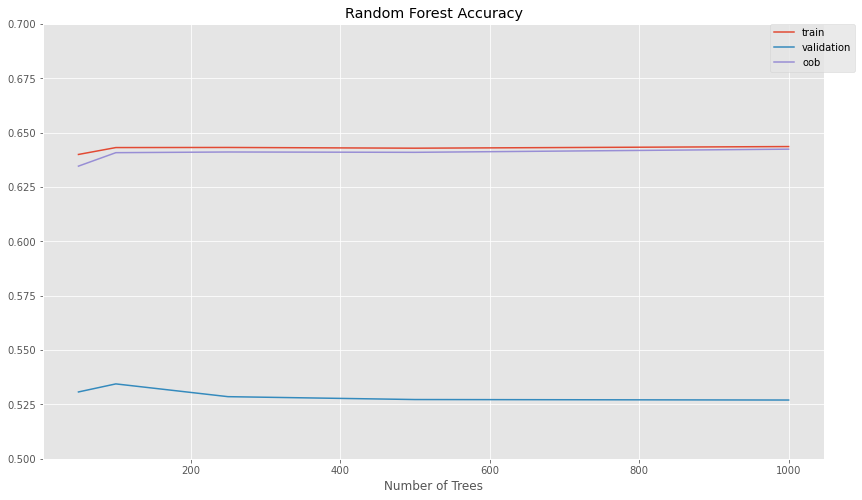

In [30]:
# Visualise the accuracy of the classifiers over the number of trees
def plot(xs, ys, labels, title='', x_label='', y_label=''):
    for x, y, label in zip(xs, ys, labels):
        plt.ylim((0.5, 0.7))
        plt.plot(x, y, label=label)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.show()

plot([n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forest Accuracy',
    'Number of Trees')

In [31]:
# List and rank the features by average order of importance
rank_features_by_importance(np.average(rf_feature_importances, axis=0), features)

      Feature                                    Importance
 1. market_vol_20d                         (0.3981692020722564)
 2. market_vol_120d                        (0.2059398660207307)
 3. dispersion_20d                         (0.19894923185174512)
 4. dispersion_120d                        (0.17172986583029906)
 5. weekday                                (0.00784396591635023)
 6. volatility_20d                         (0.00261809850611222)
 7. is_January                             (0.002513812903474668)
 8. Overnight_Sentiment_Smoothed           (0.002078863511431538)
 9. is_December                            (0.0020764844911397595)
10. Momentum_1YR                           (0.002064896591801246)
11. Mean_Reversion_Sector_Neutral_Smoothed (0.0016736917392932722)
12. adv_120d                               (0.0014924599731262443)
13. adv_20d                                (0.0013523046502018669)
14. sector_Financial Services              (0.0006380705495224388)
15. sector_Basic Ma

#### ✅ TODO: Describe and interpret the Random Forest Accuracy plot and features importance.

Include description here:

From the accuracy graph above, we can observe that the OOB is significantly lower than the score for training and validation dataset. This might mean that there is overfitting in the modelling. Ideally, we should have a model training resulting in all 3 scores being very close to each other.

For the feature importance, we can see that the sector features are more important than the other features. This indicates that the price movement behaves different for different sector. This hints at a high level of overfitting.

#### 10) Drop Overlapping Samples
The target for our classifiers is forward 1-week return. This means that our labels overlap in time, are correlated and redundant. Correlated predictions lead to an increased error rate in our classifiers.

For this model to perform well in production we need to correct for these non-IID labels.

A simple solution is to drop any overlapping samples from the dataset. Implement the `non_overlapping_samples` function to return a new dataset overlapping samples.

In [32]:
def non_overlapping_samples(x, y, n_skip_samples, start_i=0):
    """
    Get the non overlapping samples.

    Parameters
    ----------
    x : DataFrame
        The input samples
    y : Pandas Series
        The target values
    n_skip_samples : int
        The number of samples to skip
    start_i : int
        The starting index to use for the data
    
    Returns
    -------
    non_overlapping_x : 2 dimensional Ndarray
        The non overlapping input samples
    non_overlapping_y : 1 dimensional Ndarray
        The non overlapping target values
    """
    
    # Implement
    date_range = x.index.get_level_values(0).drop_duplicates()
    
    # Slice the date range to select every non-overlapping row
    nonoverlap_date_range = date_range[start_i::n_skip_samples]

    non_overlapping_x = x.index.get_level_values(0).isin(nonoverlap_date_range)
    non_overlapping_x = x[non_overlapping_x]
    
    non_overlapping_y = y.index.get_level_values(0).isin(nonoverlap_date_range)
    non_overlapping_y = y[non_overlapping_y]
    
    return non_overlapping_x, non_overlapping_y 


In [33]:
#Test your function and create non-overlapping samples
X_train_sub, y_train_sub = non_overlapping_samples(X_train, y_train, 5, start_i=0)

print(f"Non-overlapping training dataset is now reduced to to {len(X_train_sub)} training cases out of {len(X_train)} in total.")

Non-overlapping training dataset is now reduced to to 42674 training cases out of 211498 in total.


In [34]:
X_train_sub.head()

Mean_Reversion_Sector_Neutral_Smoothed  \
Date                                                                
2013-01-03 00:00:00+00:00                               -0.262769   
2013-01-03 00:00:00+00:00                                0.099926   
2013-01-03 00:00:00+00:00                                1.669138   
2013-01-03 00:00:00+00:00                                1.698746   
2013-01-03 00:00:00+00:00                               -1.113992   

                           Momentum_1YR  Overnight_Sentiment_Smoothed  \
Date                                                                    
2013-01-03 00:00:00+00:00     -1.207978                     -1.485669   
2013-01-03 00:00:00+00:00      1.713471                      0.919350   
2013-01-03 00:00:00+00:00     -1.535061                      1.507733   
2013-01-03 00:00:00+00:00      1.193111                     -1.367992   
2013-01-03 00:00:00+00:00     -0.509209                     -0.029419   

                           adv_120d   adv_20d  dispersion_120d  \
Date                                                             
2013-01-03 00:00:00+00:00  1.338573  1.397411          0.01327   
2013-01-03 00:00:00+00:00  1.139994  1.081155          0.01327   
2013-01-03 00:00:00+00:00 -0.301547 -0.919350          0.01327   
2013-01-03 00:00:00+00:00  1.728377  1.728377          0.01327   
2013-01-03 00:00:00+00:00  0.176515  0.227999          0.01327   

                           dispersion_20d  market_vol_120d  market_vol_20d  \
Date                                                                         
2013-01-03 00:00:00+00:00        0.011178         0.129664        0.137586   
2013-01-03 00:00:00+00:00        0.011178         0.129664        0.137586   
2013-01-03 00:00:00+00:00        0.011178         0.129664        0.137586   
2013-01-03 00:00:00+00:00        0.011178         0.129664        0.137586   
2013-01-03 00:00:00+00:00        0.011178         0.129664        0.137586   

                           volatility_20d  ...  sector_Technology  \
Date                                       ...                      
2013-01-03 00:00:00+00:00       -1.219809  ...                  0   
2013-01-03 00:00:00+00:00        1.566220  ...                  0   
2013-01-03 00:00:00+00:00       -1.470404  ...                  0   
2013-01-03 00:00:00+00:00        1.617813  ...                  1   
2013-01-03 00:00:00+00:00       -1.367218  ...                  0   

                           sector_Consumer Defensive  sector_Industrials  \
Date                                                                       
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   1   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   
2013-01-03 00:00:00+00:00                          0                   0   

                           sector_Utilities  sector_Financial Services  \
Date                                                                     
2013-01-03 00:00:00+00:00                 0                          0   
2013-01-03 00:00:00+00:00                 0                          0   
2013-01-03 00:00:00+00:00                 0                          0   
2013-01-03 00:00:00+00:00                 0                          0   
2013-01-03 00:00:00+00:00                 0                          0   

                           sector_Real Estate  sector_Communication Services  \
Date                                                                           
2013-01-03 00:00:00+00:00                   0                              0   
2013-01-03 00:00:00+00:00                   0                              0   
2013-01-03 00:00:00+00:00                   0                              0   
2013-01-03 00:00:00+00:00                   0                              0   
2013-

In [35]:
# Train the Random Forest Classifier with resampled data
train_score = []
valid_score = []
oob_score = []
rfol_feature_importances = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(X_train_sub, y_train_sub)
    
    # Remember: We are only training the model on the resampled data i.e. validation remains on full data
    train_score.append(clf.score(X_train_sub, y_train_sub.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)
    rfol_feature_importances.append(clf.feature_importances_)

Training Models: 100%|██████████| 5/5 [00:16<00:00,  3.32s/Model]


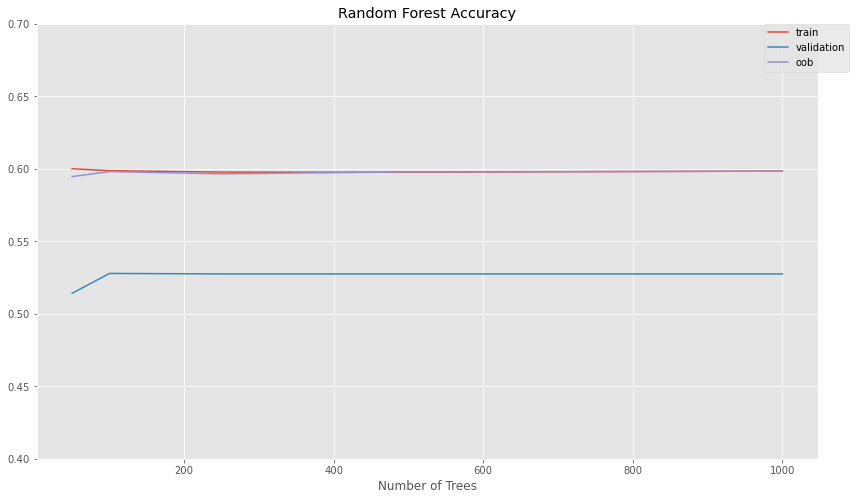

In [36]:
# Visualise the accuracy of the classifiers over the number of trees
def plot(xs, ys, labels, title='', x_label='', y_label=''):
    for x, y, label in zip(xs, ys, labels):
        plt.ylim((0.4, 0.7))
        plt.plot(x, y, label=label)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.show()

plot([n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forest Accuracy',
    'Number of Trees')

In [37]:
# List and rank the features by average order of importance
rank_features_by_importance(np.average(rfol_feature_importances, axis=0), features)

      Feature                                    Importance
 1. market_vol_20d                         (0.3440874297713262)
 2. dispersion_20d                         (0.1985052899741268)
 3. market_vol_120d                        (0.18530295521679951)
 4. dispersion_120d                        (0.11415416369086191)
 5. weekday                                (0.08517716389172011)
 6. volatility_20d                         (0.01943202169435085)
 7. Momentum_1YR                           (0.016395412474426798)
 8. Overnight_Sentiment_Smoothed           (0.012162979529316562)
 9. Mean_Reversion_Sector_Neutral_Smoothed (0.010133141574014765)
10. adv_120d                               (0.007997864592027025)
11. adv_20d                                (0.0066515775910293866)
12. sector_Energy                          (0.0)
13. is_January                             (0.0)
14. is_December                            (0.0)
15. sector_Basic Materials                 (0.0)
16. month_start          

#### ✅ TODO: Describe and interpret the Random Forest Accuracy plot  and features importance with resampled data.

Include description here:

The accuracy performs better after removing overlapping data. The train, validation and oob scores are closer together which means the model trained reflects the real world situation better.

For the feature importance, we can observe a greater range of features being used and we dont have any feature/s dominating the model. This can mean a lower level of overfitting.

#### 11) Experimental Section

Up to this point, we have fitted and tested one Decision Tree and five Random Forest with Different Tree Sizes.

In this section you can experiment with different classifiers (e.g. [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier), [etc.](https://scikit-learn.org/stable/supervised_learning.html)), engineer new features, or take any steps with the goal of create a model with the highest predictive accuracy which will generalize well to new observations i.e. the validation data.

In [38]:
from sklearn.svm import SVC
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.pipeline import Pipeline, make_pipeline

clf = SVC(C=10)
clf.fit(X_train_sub, y_train_sub)

print('Training Score', clf.score(X_train_sub, y_train_sub.values))
print('Validation Score', clf.score(X_valid, y_valid.values))
print('Test Score', clf.score(X_test, y_test))

Training Score 0.6229319960631766
Validation Score 0.5406175974127293
Test Score 0.5337806210017163


### 12) Final Model Testing

This final task is to test your chosen "best" classifier against the test dataset.

##### Re-Training Model
In production, we would roll forward the training. Typically you would re-train up to the "current day" and then test. Here, we will train on the train & validation dataset (Hint: use the [pandas concat() function](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)), and test on the test dataset `[X_test, y_test]`.

In [39]:
# Combine training and validation datasets 
X_train_full = pd.concat([X_train, X_valid])
y_train_full = pd.concat([y_train, y_valid])
# Drop Overlapping Samples in our training dataset
X_train_final, y_train_final = non_overlapping_samples(X_train_full, y_train_full, 5, 0)

# Set test data variables
X_test_final = X_test
y_test_final = y_test

In [40]:
# Instantiate the chosen classification model with the listed parameters
final_clf = RandomForestClassifier(200, **clf_parameters)

# Fit the classification model to the training data using fit()
final_clf.fit(X_train_final, y_train_final) 

RandomForestClassifier(criterion='entropy', min_samples_leaf=5000,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0)

In [41]:
# Calculate the mean training and validation accuracy using the score(X, y) method
train_score_final_clf = final_clf.score(X_train_final, y_train_final.values)
valid_score_final_clf = final_clf.score(X_test_final, y_test_final.values)
oob_score_final_clf = final_clf.oob_score_ #Delete here and below as appropriate

print(f"Best Classifier Testing \n Training Accuracy: {train_score_final_clf:.4f} \
      \n Test Accuracy: {valid_score_final_clf:.4f} \n Out-of-bag Score: {oob_score_final_clf:.4f}")

Best Classifier Testing 
 Training Accuracy: 0.5822       
 Test Accuracy: 0.4757 
 Out-of-bag Score: 0.5830
